## Observations and Insights

* Data showed that Capomulin can reduce tumor size over time.
* Tumor size is possitively corrolated with weight.
* Capomulin and Ramicane have the best performance on reducing turmor size

## Dependencies and starter code

In [54]:
%matplotlib notebook

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# set figure size to 9x5
plt.rcParams['figure.figsize'] = [9, 5]

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

In [56]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [57]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [58]:
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_drug = merged_data.groupby('Drug Regimen')

mean = grouped_by_drug['Tumor Volume (mm3)'].mean()
median = grouped_by_drug['Tumor Volume (mm3)'].median()
variance = grouped_by_drug['Tumor Volume (mm3)'].var()
std = grouped_by_drug['Tumor Volume (mm3)'].std()
sem = grouped_by_drug['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame(mean)
summary_df.rename(columns={'Tumor Volume (mm3)':'Mean'}, inplace=True)
summary_df['Median'] = median
summary_df['Variance'] = variance
summary_df['Standard Deviation'] = std
summary_df['SEM'] = sem

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

              Number of Data Points
Drug Regimen                       
Capomulin                       230
Ceftamin                        178
Infubinol                       178
Ketapril                        188
Naftisol                        186
Placebo                         181
Propriva                        161
Ramicane                        228
Stelasyn                        181
Zoniferol                       182


<IPython.core.display.Javascript object>


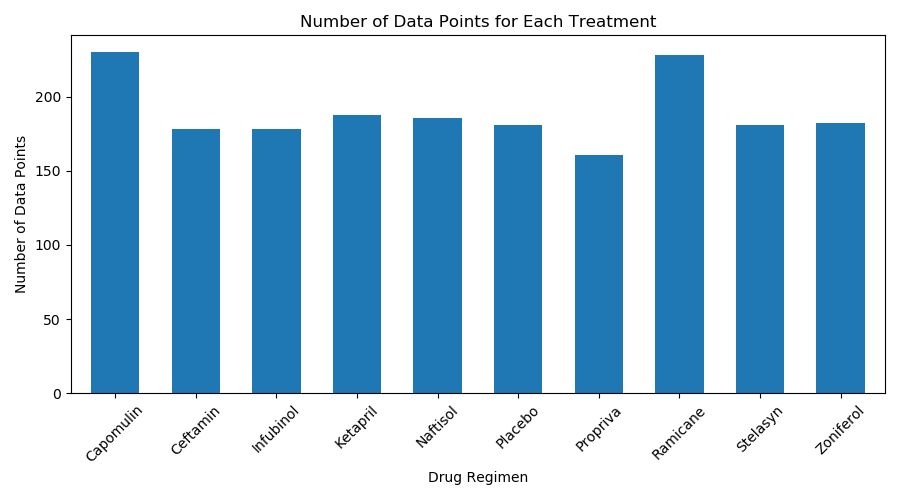

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#datapoint_count = merged_data['Drug Regimen'].value_counts()
datapoint_count = merged_data.groupby('Drug Regimen')['Mouse ID'].count()
bar_chart_df= pd.DataFrame({'Number of Data Points':datapoint_count})

print(bar_chart_df)
bar_width = 0.6
pandas_bar_chart = bar_chart_df.plot( kind='bar', legend=False, width = bar_width, title="Number of Data Points for Each Treatment", rot=45)
pandas_bar_chart.set_ylabel("Number of Data Points")

plt.tight_layout()
plt.show()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


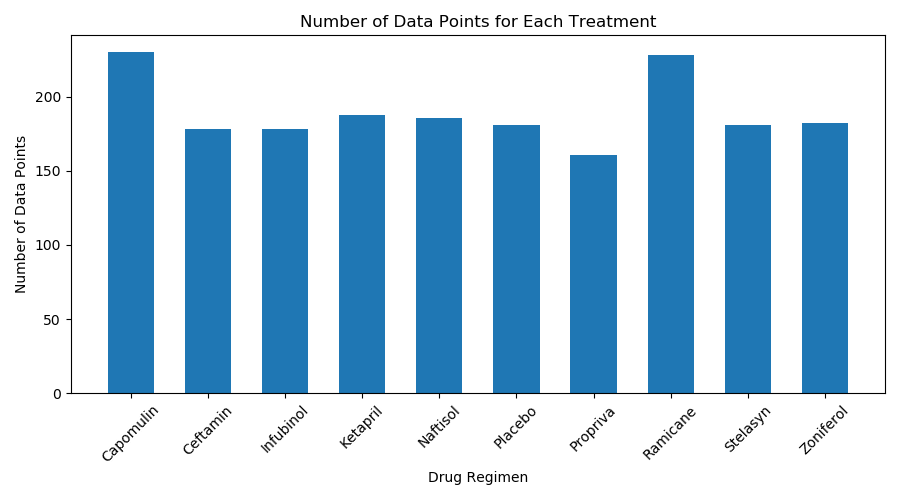

In [61]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
print(datapoint_count)
x_labels = datapoint_count.index

x = np.arange(len(x_labels))
tick_locations = [value for value in x]
plt.figure()
plt.bar(x_labels, datapoint_count, width=bar_width)
plt.xticks(tick_locations, rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment")

plt.tight_layout()
plt.show()

## Pie plots

<IPython.core.display.Javascript object>


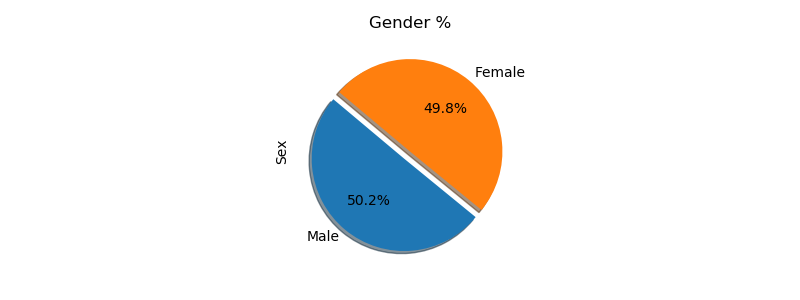

Male      125
Female    124
Name: Sex, dtype: int64


In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# create a new plot so that it won't mess up previous plot
plt.figure(figsize=(8,3))

gender_count = mouse_metadata['Sex'].value_counts()
#gender_count2 = merged_data['Sex'].value_counts()
# explode is a len(x) array which specifies the fraction of the radius with which to offset each wedge
explode = (0.1, 0)
gender_count.plot(kind = 'pie', explode = explode, shadow=True, title='Gender %', startangle=140, autopct="%1.1f%%")
print(gender_count)
#print(gender_count2)

<IPython.core.display.Javascript object>


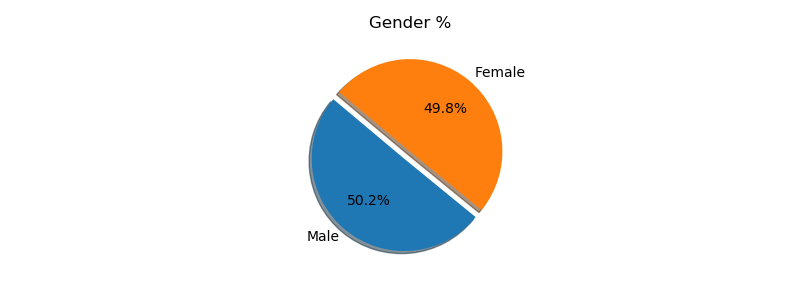

Text(0.5, 1.0, 'Gender %')

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,3))
plt.pie(gender_count.values, explode=explode, labels=gender_count.index, shadow=True, startangle=140, autopct="%1.1f%%")
plt.title('Gender %')

## Quartiles, outliers and boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# the four most promissing treament regiments are given
top4_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(top4_drugs)]
filtered_data = filtered_data.copy()  # make a copy to get rid of warning

# sort by Timepoint
filtered_data.sort_values('Timepoint', inplace=True)

# group by Mouse ID and get Weight and last Tumor Volume
grouped_by_mouse = filtered_data.groupby('Mouse ID')

# since the data was sorted by Timepoint, the last() method will return the final tumor volume
mouse_final_tumor_volume =  grouped_by_mouse['Tumor Volume (mm3)'].last()

mouse_final_tumor_volume_df = pd.DataFrame(mouse_final_tumor_volume)
mouse_final_tumor_volume_df.columns = ['Final Tumor Volume (mm3)']
merged_df = pd.merge(mouse_final_tumor_volume_df, mouse_metadata, on='Mouse ID')

#print(f"merged_df: \n {merged_df}")

capomulin = merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Final Tumor Volume (mm3)']
ramicane = merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Final Tumor Volume (mm3)']
infubinol = merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Final Tumor Volume (mm3)']
ceftamin = merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume (mm3)']

boxplot_data = [capomulin, ramicane, infubinol, ceftamin]
#print(f"all_data: \n {all_data}")


index = 0 # for drug name
# loop through all 4 data list, and print out quantile statistics for each drug
for data in boxplot_data:
    drug = top4_drugs[index]
    index += 1
    
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume for {drug} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {drug} is: {upperq}")
    print(f"The interquartile range of tumor volume for {drug} is: {iqr}")
    print(f"The the median of tumor volume for {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {drug} .")
    print(f"Values above {upper_bound} could be outliers for {drug} .")

    for i in data:
        if i < lower_bound or i > upper_bound:
            print(f"-----> found outliner: {i}   <----------")

    print("")

The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
The the median of tumor volume for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin .
Values above 51.83201549 could be outliers for Capomulin .

The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The the median of tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane .
Values above 54.30681135 could be outliers for Ramicane .

The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
The th

<IPython.core.display.Javascript object>


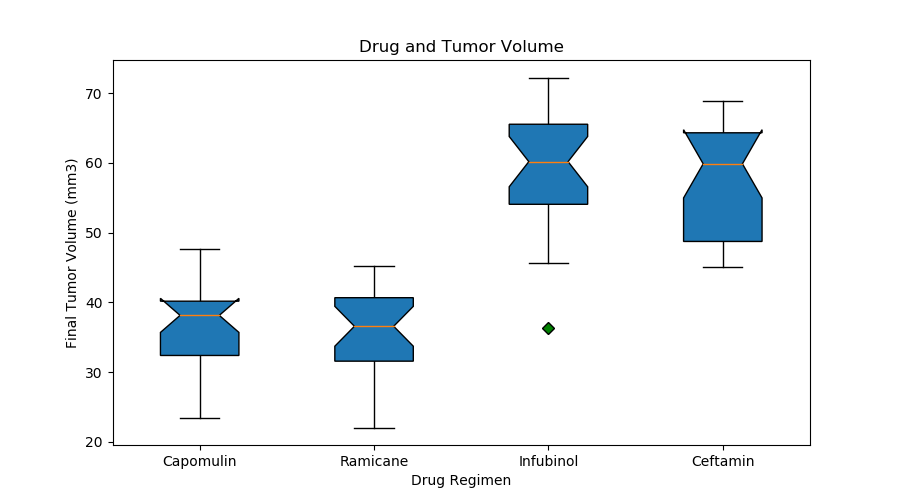

outlier: 36.321345799999996


In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_labels = top4_drugs
fig, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
bplot1 = ax1.boxplot(boxplot_data, labels=x_labels, notch=True, patch_artist=True, vert=True, flierprops=green_diamond)
ax1.set_title("Drug and Tumor Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

print(f"outlier: {infubinol.min()}")

## Line and scatter plots

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# show all unique mouse id
capomulin_data['Mouse ID'].unique()


array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

<IPython.core.display.Javascript object>


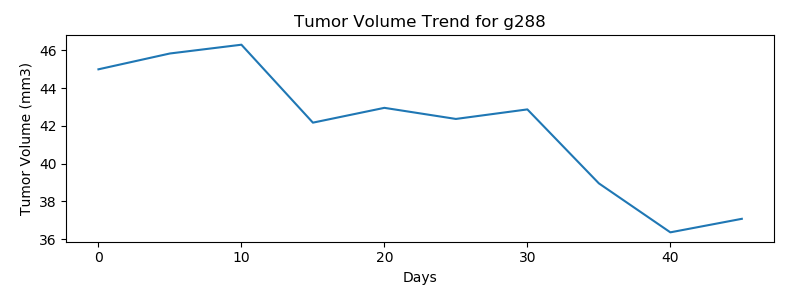

In [67]:
# pick a Mouse ID from above
mouse_id = 'g288'
x_axis = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]['Timepoint']
y_values = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]['Tumor Volume (mm3)']


plt.figure(figsize=(8,3))
plt.title(f"Tumor Volume Trend for {mouse_id}")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.plot(x_axis,y_values)

<IPython.core.display.Javascript object>


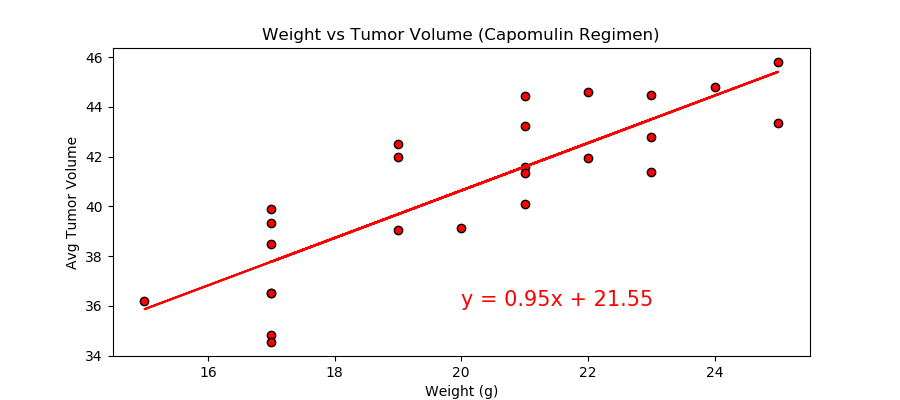

Text(0, 0.5, 'Avg Tumor Volume')

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data = mouse_metadata[mouse_metadata['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data.copy()

# sort data by Mouse ID
capomulin_data.sort_values('Mouse ID', inplace=True)
weight_data = capomulin_data['Weight (g)']

capomulin_data2 = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

grouped_by_mouse = capomulin_data2.groupby('Mouse ID')

avg_tumor_volume = grouped_by_mouse['Tumor Volume (mm3)'].mean()

plt.figure(figsize=(9,4))
plt.scatter(weight_data,avg_tumor_volume, marker= 'o', facecolor='red', edgecolors='black')
plt.title("Weight vs Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume")



In [69]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_data, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_data, avg_tumor_volume)
regress_values = weight_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight_data,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()



The correlation between both factors is 0.84
The r-squared is: 0.8419363424694718
